In [1]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

/tmp/ipykernel_196521/2514700534.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df_unbalanced.groupby('label', group_keys=False).apply(


Accuracy (MultinomialNB): 0.8966666666666666


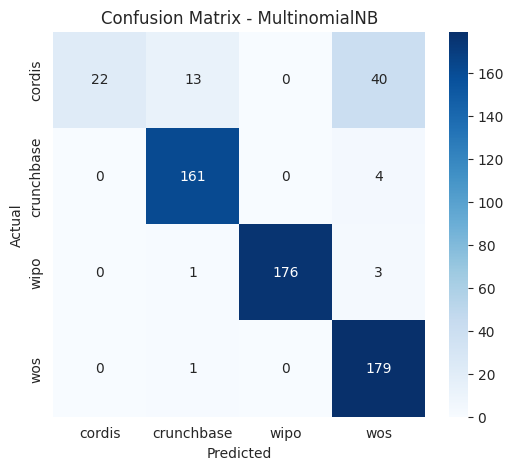

Accuracy (ComplementNB): 0.965


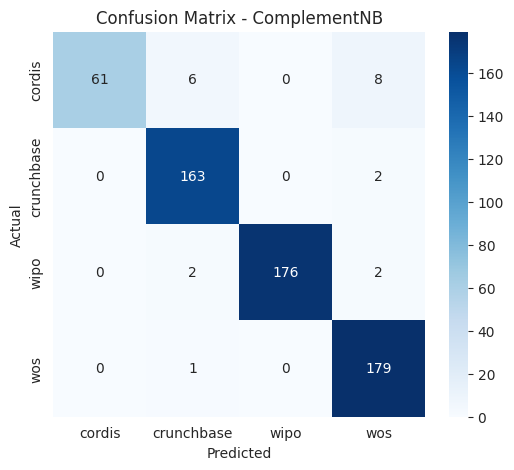

Accuracy (LinearSVC): 0.995


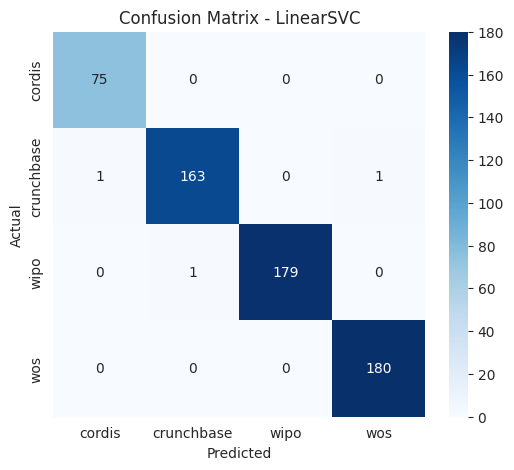

In [2]:
# Load dataset
df_unbalanced = pd.read_csv('data_input/data.csv')

df = df_unbalanced.groupby('label', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), 900), random_state=19)
).reset_index(drop=True)

df = df[df_unbalanced.columns]

# Ensure test data is the same as used during training
_, X_test, _, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=19, stratify=df['label'])

# Load trained models
models = {
    "MultinomialNB": joblib.load('model_mnb.pkl'),
    "ComplementNB": joblib.load('model_cnb.pkl'),
    "LinearSVC": joblib.load('model_svc.pkl')
}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Accuracy ({name}):", accuracy_score(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, name)